<a href="https://colab.research.google.com/github/MusanjeRichard5/ML_DL_UseCases/blob/main/Gait_Recognition_using_2D_keypoints_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gait Recognition using 2D keypoints with LSTM

This notebook explores use of 2D key points obtained from 360 Degree Gait capture dataset https://opendata.ljmu.ac.uk/id/eprint/133/ . These 2D keypoints where generated using pre-trained OpenPose 2D HPE https://arxiv.org/pdf/1812.08008  which provides 75 anatomical keypoints i.e nose , neck , right shoulder etc.

We chose to use LSTM (Long Short-Term Memory) for gait recognition because it excels at capturing temporal dependencies in sequential data, making it ideal for modeling the dynamic patterns of walking over time. Its ability to learn long-term relationships ensures robust identification of individual gait characteristics.

# Getting the Datset

Dowloading the data

In [ ]:
! wget https://opendata.ljmu.ac.uk/id/eprint/133/3/Gait%20Dataset.zip

--2025-02-02 19:03:46--  https://opendata.ljmu.ac.uk/id/eprint/133/3/Gait%20Dataset.zip
Resolving opendata.ljmu.ac.uk (opendata.ljmu.ac.uk)... 52.178.143.127
Connecting to opendata.ljmu.ac.uk (opendata.ljmu.ac.uk)|52.178.143.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18700445600 (17G) [application/zip]
Saving to: ‘Gait Dataset.zip’

Gait Dataset.zip    100%[===================>]  17.42G   165MB/s    in 2m 33s  

2025-02-02 19:06:19 (117 MB/s) - ‘Gait Dataset.zip’ saved [18700445600/18700445600]



Link to dataset Description
https://www.nature.com/articles/s41597-023-02161-8.pdf

Unziping the data into our working directory

In [ ]:
! unzip "/content/Gait Dataset.zip" -d "/content/Data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000007_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000008_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000009_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000010_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000011_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000012_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000013_keypoints.json  
  inflating: /content/Data/Participant_9/Experiment_2/E2T4/P9_E2T4_45_json/P9_E2T4_45_000000000014_keypoints.json  
  inflating: /content

Visualizing a sample of skeleton frames from one of folder

In [ ]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import os

def visualize_skeleton_from_folder(video_path, json_folder, num_frames=10):
    """
    Visualizes skeleton points from JSON files in a folder on corresponding video frames.

    :param video_path: Path to the video file
    :param json_folder: Path to the folder containing per-frame JSON files
    :param num_frames: Number of frames to visualize (default is 10)
    """
    # Open the video
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(total_frames)

    # Select evenly spaced frames
    selected_frames = np.linspace(0, total_frames-1, num_frames, dtype=int)

    fig, axes = plt.subplots(1, num_frames, figsize=(200, 150))

    # Increase display size
    #fig, axes = plt.subplots(1, num_frames, figsize=)

    for idx, frame_idx in enumerate(selected_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            print(f"Skipping frame {frame_idx} (could not read)")
            continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Construct JSON filename (Assuming naming pattern: "frame_0001.json")
        json_filename = f"frame_{frame_idx:04d}.json"  # Adjust format as needed
        json_path = os.path.join(json_folder, json_filename)

        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                skeleton_data = json.load(f)

            # Assuming skeleton_data contains a list of (x, y) coordinates
            for (x, y) in skeleton_data:
                cv2.circle(frame_rgb, (int(x), int(y)), 5, (0, 255, 0), -1)  # Draw green circle

        else:
            print(f"JSON file not found for frame {frame_idx}: {json_filename}")

        # Display frame with skeleton
        axes[idx].imshow(frame_rgb)
        axes[idx].set_title(f"Frame {frame_idx}")
        axes[idx].axis("off")

    cap.release()
    plt.tight_layout()
    plt.show()


194
JSON file not found for frame 0: frame_0000.json
JSON file not found for frame 21: frame_0021.json
JSON file not found for frame 42: frame_0042.json
JSON file not found for frame 64: frame_0064.json
JSON file not found for frame 85: frame_0085.json
JSON file not found for frame 107: frame_0107.json
JSON file not found for frame 128: frame_0128.json
JSON file not found for frame 150: frame_0150.json
JSON file not found for frame 171: frame_0171.json
JSON file not found for frame 193: frame_0193.json


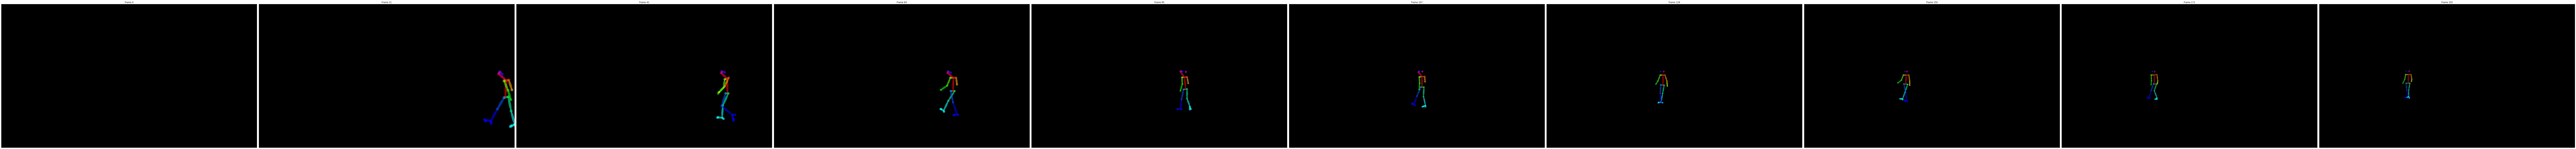

In [ ]:
video_path = "/content/Data/Participant_1/Experiment_1/E1T1/P1_E1T1_45_skeleton.avi"
json_folder = "/content/Data/Participant_1/Experiment_1/E1T1/P1_E1T1_45_json"
visualize_skeleton_from_folder(video_path, json_folder, num_frames=10)


Extracting skeleton 2D keypoints into a dataframe

In [ ]:
import os
import json
import pandas as pd
from glob import glob

# Define indices for right hip (8) and left hip (11) in COCO format
RIGHT_HIP_INDEX = 8
LEFT_HIP_INDEX = 11

def extract_skeleton_data_all_participants(root_dir):
    """
    Iterates through all participant folders, reads JSON files, extracts (x, y) keypoints (excluding confidence),
    and stores them in a DataFrame. Drops frames where the right or left hip confidence is zero.

    :param root_dir: Path to the dataset directory (e.g., "/content/Data/")
    :return: Pandas DataFrame containing extracted 2D skeleton data for all participants.
    """
    data_list = []  # List to store extracted data before creating DataFrame

    # Iterate through all participants
    participants = sorted(os.listdir(root_dir))
    if not participants:
        print("No participant folders found.")
        return pd.DataFrame()  # Return empty DataFrame if no folders exist

    for participant in participants:
        participant_path = os.path.join(root_dir, participant)

        if not os.path.isdir(participant_path):
            continue  # Skip non-directory files

        # Extract participant number from folder name (e.g., "Participant_1" → 1)
        try:
            participant_num = int(participant.split("_")[-1])  # Extracts the last part after "_"
        except ValueError:
            print(f"Skipping {participant}: Could not extract participant number.")
            continue  # Skip if folder name doesn't match pattern

        print(f"Processing participant: {participant} (Target = {participant_num})")

        # Iterate through experiments
        for experiment in sorted(os.listdir(participant_path)):
            experiment_path = os.path.join(participant_path, experiment)

            if not os.path.isdir(experiment_path):
                continue

            # Iterate through tasks (E1T1, E1T2, ...)
            for task in sorted(os.listdir(experiment_path)):
                task_path = os.path.join(experiment_path, task)

                if not os.path.isdir(task_path):
                    continue

                # Iterate through JSON folders inside the task
                for json_folder in sorted(os.listdir(task_path)):
                    json_folder_path = os.path.join(task_path, json_folder)

                    if not os.path.isdir(json_folder_path):
                        continue

                    # Get all JSON files in the folder
                    json_files = sorted(glob(os.path.join(json_folder_path, "*.json")))

                    for json_file in json_files:
                        with open(json_file, "r") as f:
                            data = json.load(f)

                        # Extract pose keypoints (x, y, confidence) from JSON
                        people = data.get("people", [])
                        if len(people) == 0:
                            continue  # Skip empty frames

                        keypoints = people[0].get("pose_keypoints_2d", [])
                        if not keypoints:
                            continue  # Skip frames with missing keypoints

                        # Ensure that the keypoints contain exactly 25 keypoints (each with x, y, confidence)
                        if len(keypoints) != 75:  # 25 keypoints × 3 values (x, y, confidence)
                            print(f"Skipping {json_file}: Incorrect number of keypoints (expected 75, found {len(keypoints)})")
                            continue

                        # Extract x, y coordinates only (ignore confidence)
                        xy_coords = [keypoints[i:i+2] for i in range(0, len(keypoints), 3)]

                        # Get confidence values for right hip and left hip
                        right_hip_conf = keypoints[RIGHT_HIP_INDEX * 3 + 2]  # Confidence value for right hip
                        left_hip_conf = keypoints[LEFT_HIP_INDEX * 3 + 2]   # Confidence value for left hip

                        # Skip frames where the right or left hip confidence is zero
                        if right_hip_conf == 0 or left_hip_conf == 0:
                            print(f"Skipping {json_file}: Missing hip bone confidence.")
                            continue

                        print(f"Extracted {len(xy_coords)} keypoints from {json_file}")

                        # Store extracted data
                        data_list.append({
                            "Participant": participant,
                            "Experiment": experiment,
                            "Task": task,
                            "JSON_Folder": json_folder,
                            "Frame": os.path.basename(json_file),
                            "Keypoints": xy_coords,  # Store (x, y) pairs as a list
                            "Target": participant_num  # Add participant number as the target
                        })

    # Convert list to DataFrame
    df = pd.DataFrame(data_list)

    print(f"Data extraction complete. {len(df)} frames processed across all participants.")
    return df


Calling the extract seleton function

In [ ]:
root_dir = "/content/Data/"
df_all = extract_skeleton_data_all_participants(root_dir)

Streaming output truncated to the last 5000 lines.
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000047_keypoints.json
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000048_keypoints.json
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000049_keypoints.json
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000050_keypoints.json
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000051_keypoints.json
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000052_keypoints.json
Extracted 25 keypoints from /content/Data/Participant_9/Experiment_2/E2T5/P9_E2T5_45_json/P9_E2T5_45_000000000053_keypoints.json
Extracted 25 keypoints from /content/Data/Part

In [ ]:
df_all.head()

,Participant,Experiment,Task,JSON_Folder,Frame,Keypoints,Target
0,Participant_1,Experiment_1,E1T1,P1_E1T1_45_json,P1_E1T1_45_000000000015_keypoints.json,"[[1246.57, 341.367], [1279.87, 382.476], [1268...",1
1,Participant_1,Experiment_1,E1T1,P1_E1T1_45_json,P1_E1T1_45_000000000016_keypoints.json,"[[1240.61, 337.582], [1279.83, 382.557], [1262...",1
2,Participant_1,Experiment_1,E1T1,P1_E1T1_45_json,P1_E1T1_45_000000000018_keypoints.json,"[[1226.94, 347.246], [1260.23, 382.462], [1260...",1
3,Participant_1,Experiment_1,E1T1,P1_E1T1_45_json,P1_E1T1_45_000000000019_keypoints.json,"[[1219.1, 349.217], [1252.41, 382.471], [1258....",1
4,Participant_1,Experiment_1,E1T1,P1_E1T1_45_json,P1_E1T1_45_000000000020_keypoints.json,"[[1211.19, 349.188], [1244.62, 382.508], [1250...",1


In [ ]:
# Check keypoints and target for a sample frame
df_all[["Keypoints", "Target"]].iloc[0:100]

,Keypoints,Target
0,"[[1260.09, 339.443], [1279.89, 378.624], [1279...",1
1,"[[1246.57, 341.367], [1279.87, 382.476], [1268...",1
2,"[[1240.61, 337.582], [1279.83, 382.557], [1262...",1
3,"[[1230.91, 341.435], [1266.1, 382.505], [1264....",1
4,"[[1226.94, 347.246], [1260.23, 382.462], [1260...",1
...,...,...
95,"[[637.178, 343.389], [652.913, 364.817], [666....",1
96,"[[633.309, 347.217], [649.051, 364.868], [664....",1
97,"[[627.441, 341.38], [646.989, 362.968], [656.8...",1
98,"[[617.701, 339.489], [639.155, 361.002], [651....",1


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513734 entries, 0 to 513733
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Participant  513734 non-null  object
 1   Experiment   513734 non-null  object
 2   Task         513734 non-null  object
 3   JSON_Folder  513734 non-null  object
 4   Frame        513734 non-null  object
 5   Keypoints    513734 non-null  object
 6   Target       513734 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 27.4+ MB


# Data Preparation and Model Building

Sorting the dataframe according to Participants number

In [ ]:
# Extract numeric part from 'Participant' column
df_all["Participant_Number"] = df_all["Participant"].str.extract(r"(\d+)").astype(int)

# Sort DataFrame by the numeric part of 'Participant' column
df_sorted = df_all.sort_values(by="Participant_Number", ascending=True).reset_index(drop=True)
df_sorted.tail()

,Participant,Experiment,Task,JSON_Folder,Frame,Keypoints,Target,Participant_Number
513729,Participant_65,Experiment_3,E3T5,P65_E3T5_Rear_json,P65_E3T5_Rear_000000000145_keypoints.json,"[[0, 0], [635.17, 353.197], [666.567, 353.208]...",65,65
513730,Participant_65,Experiment_3,E3T5,P65_E3T5_Rear_json,P65_E3T5_Rear_000000000146_keypoints.json,"[[0, 0], [635.188, 353.187], [666.589, 353.186...",65,65
513731,Participant_65,Experiment_3,E3T5,P65_E3T5_Rear_json,P65_E3T5_Rear_000000000147_keypoints.json,"[[0, 0], [635.203, 353.191], [666.606, 353.208...",65,65
513732,Participant_65,Experiment_3,E3T5,P65_E3T5_Rear_json,P65_E3T5_Rear_000000000148_keypoints.json,"[[0, 0], [635.18, 355.077], [666.594, 355.07],...",65,65
513733,Participant_65,Experiment_3,E3T5,P65_E3T5_Rear_json,P65_E3T5_Rear_000000000137_keypoints.json,"[[0, 0], [631.262, 359.049], [664.571, 361.002...",65,65


Preparing data for LSTM, working a selected number of participants due to RAM limitations

In [ ]:
unique_participants = df_sorted["Participant"].unique()[:10]  # Get the first two participants
df_10 = df_sorted[df_sorted["Participant"].isin(unique_participants)]
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93200 entries, 0 to 93199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Participant         93200 non-null  object
 1   Experiment          93200 non-null  object
 2   Task                93200 non-null  object
 3   JSON_Folder         93200 non-null  object
 4   Frame               93200 non-null  object
 5   Keypoints           93200 non-null  object
 6   Target              93200 non-null  int64 
 7   Participant_Number  93200 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ MB


In [ ]:
df_10["Participant"].value_counts()

,count
Participant,
Participant_6,11846
Participant_4,10041
Participant_2,9958
Participant_9,9819
Participant_7,9660
Participant_8,9585
Participant_1,9381
Participant_3,8878
Participant_5,8781


In [ ]:
df_10["Target"].value_counts()

,count
Target,
6,11846
4,10041
2,9958
9,9819
7,9660
8,9585
1,9381
3,8878
5,8781


In [ ]:
df_10.describe()

,Target,Participant_Number
count,93200.000000,93200.000000
mean,5.324646,5.324646
std,2.741717,2.741717
min,1.000000,1.000000
25%,3.000000,3.000000
50%,5.000000,5.000000
75%,8.000000,8.000000
max,10.000000,10.000000


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def prepare_lstm_data_ten_participants(df, sequence_length=50):
    """
    Function to prepare LSTM data for only the first ten participants.

    :param df: Pandas DataFrame containing skeleton data.
    :param sequence_length: Number of frames per sequence.
    :return: (X_train, X_test, y_train, y_test) as NumPy arrays for LSTM training.
    """
    # Filter data to only include the first ten participants
    unique_participants = df["Participant"].unique()[:10]  # Get the first ten participants
    df = df[df["Participant"].isin(unique_participants)]  # Filter the DataFrame to include only those participants

    # Sort data by participant, experiment, task, and frame
    df = df.sort_values(by=["Participant", "Experiment", "Task", "Frame"]).reset_index(drop=True)

    # Initialize lists to store sequences and labels
    all_sequences = []
    all_labels = []

    # Define indices for right hip (8) and left hip (11) in COCO format
    RIGHT_HIP_INDEX = 8
    LEFT_HIP_INDEX = 11

    # Iterate through each row in the DataFrame
    for participant, group in df.groupby("Participant"):
        keypoints_list = group["Keypoints"].tolist()  # List of keypoints for each frame
        labels_list = group["Target"].tolist()  # List of labels for each frame

        # Initialize lists to store valid frames for this participant
        valid_frames = []
        valid_labels = []

        # Iterate through each frame's keypoints
        for keypoints, label in zip(keypoints_list, labels_list):
            # Ensure the keypoints are in the correct shape: (num_keypoints, 2)
            keypoints = np.array(keypoints).reshape(-1, 2)  # Reshape to [num_keypoints, 2] (x, y)

            # Check if there are 25 keypoints (25 * 2 = 50 values)
            if keypoints.shape[0] != 25:
                print(f"Skipping frame with invalid number of keypoints: {keypoints.shape[0]} found, expected 25.")
                continue  # Skip this frame

            # Calculate middle hip
            right_hip = keypoints[RIGHT_HIP_INDEX]  # (x, y)
            left_hip = keypoints[LEFT_HIP_INDEX]   # (x, y)
            middle_hip = (right_hip + left_hip) / 2

            # Normalize keypoints by subtracting the middle hip coordinates
            normalized_keypoints = keypoints.copy()
            normalized_keypoints[:, :2] -= middle_hip

            # Flatten normalized keypoints to [num_features]
            normalized_keypoints = normalized_keypoints.flatten()  # Shape: [num_features]

            # Add to valid frames and labels
            valid_frames.append(normalized_keypoints)
            valid_labels.append(label)

        # Create sequences using a sliding window
        for i in range(len(valid_frames) - sequence_length + 1):
            sequence = valid_frames[i:i + sequence_length]  # Shape: [sequence_length, num_features]
            label = valid_labels[i + sequence_length - 1]  # Label for the last frame in the sequence
            all_sequences.append(sequence)
            all_labels.append(label)

    # Convert sequences and labels to NumPy arrays
    X = np.array(all_sequences)  # Shape: [num_sequences, sequence_length, num_features]
    y = np.array(all_labels)  # Shape: [num_sequences]

    # Check for the range of labels before adjustment
    print("Unique labels before adjustment:", np.unique(y))

    # Convert labels to one-hot encoding
    unique_labels = np.unique(y)
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    y = np.array([label_mapping[label] for label in y])

    # Ensure that the number of classes matches the range of labels
    num_classes = len(np.unique(y))  # Number of unique labels
    print("Number of classes:", num_classes)

    # Convert to one-hot encoding
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    print(f"Data Ready: {X_train.shape} training samples, {X_test.shape} test samples.")

    return X_train, X_test, y_train, y_test


In [ ]:
#Preparing Data of first 10 participants for 3D model Training
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def prepare_lstm_data_ten_participants_3d(df, sequence_length=50):
    """
    Function to prepare LSTM data for only the first ten participants using 3D keypoints (x, y, z).

    :param df: Pandas DataFrame containing skeleton data.
    :param sequence_length: Number of frames per sequence.
    :return: (X2_train, X2_test, y2_train, y2_test) as NumPy arrays for LSTM training.
    """
    # Filter data to only include the first ten participants
    unique_participants = df["Participant"].unique()[:10]  # Get the first ten participants
    df = df[df["Participant"].isin(unique_participants)]  # Filter the DataFrame to include only those participants

    # Sort data by participant, experiment, task, and frame
    df = df.sort_values(by=["Participant", "Experiment", "Task", "Frame"]).reset_index(drop=True)

    # Initialize lists to store sequences and labels
    all_sequences = []
    all_labels = []

    # Define indices for right hip (8) and left hip (11) in COCO format
    RIGHT_HIP_INDEX = 8
    LEFT_HIP_INDEX = 11

    # Iterate through each row in the DataFrame
    for participant, group in df.groupby("Participant"):
        keypoints_list = group["Keypoints"].tolist()  # List of keypoints for each frame
        labels_list = group["Target"].tolist()  # List of labels for each frame

        # Initialize lists to store valid frames for this participant
        valid_frames = []
        valid_labels = []

        # Iterate through each frame's keypoints
        for keypoints, label in zip(keypoints_list, labels_list):
            # Reshape to [num_keypoints, 3] (x, y, z)
            keypoints = np.array(keypoints).reshape(-1, 3)

            # Check if there are 25 keypoints (25 * 3 = 75 values)
            if keypoints.shape[0] != 25:
                print(f"Skipping frame with invalid number of keypoints: {keypoints.shape[0]} found, expected 25.")
                continue  # Skip this frame

            # Calculate middle hip
            right_hip = keypoints[RIGHT_HIP_INDEX]  # (x, y, z)
            left_hip = keypoints[LEFT_HIP_INDEX]   # (x, y, z)
            middle_hip = (right_hip + left_hip) / 2

            # Normalize keypoints by subtracting the middle hip coordinates
            normalized_keypoints = keypoints.copy()
            normalized_keypoints[:, :3] -= middle_hip

            # Flatten normalized keypoints to [num_features]
            normalized_keypoints = normalized_keypoints.flatten()  # Shape: [num_features]

            # Add to valid frames and labels
            valid_frames.append(normalized_keypoints)
            valid_labels.append(label)

        # Create sequences using a sliding window
        for i in range(len(valid_frames) - sequence_length + 1):
            sequence = valid_frames[i:i + sequence_length]  # Shape: [sequence_length, num_features]
            label = valid_labels[i + sequence_length - 1]  # Label for the last frame in the sequence
            all_sequences.append(sequence)
            all_labels.append(label)

    # Convert sequences and labels to NumPy arrays
    X = np.array(all_sequences)  # Shape: [num_sequences, sequence_length, num_features]
    y = np.array(all_labels)  # Shape: [num_sequences]

    # Check for the range of labels before adjustment
    print("Unique labels before adjustment:", np.unique(y))

    # Convert labels to one-hot encoding
    unique_labels = np.unique(y)
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    y = np.array([label_mapping[label] for label in y])

    # Ensure that the number of classes matches the range of labels
    num_classes = len(np.unique(y))  # Number of unique labels
    print("Number of classes:", num_classes)

    # Convert to one-hot encoding
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    # Split data into training and testing sets
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    print(f"Data Ready: {X2_train.shape} training samples, {X2_test.shape} test samples.")

    return X2_train, X2_test, y2_train, y2_test

In [ ]:
# Assume df is the DataFrame we extracted earlier this is for 2D model
X_train, X_test, y_train, y_test = prepare_lstm_data_ten_participants(df_sorted, sequence_length=50)

Unique labels before adjustment: [ 1  2  3  4  5  6  7  8  9 10]
Number of classes: 10
Data Ready: (63184, 50, 50) training samples, (15796, 50, 50) test samples.


In [ ]:
# Assuming 'df_sorted' is your DataFrame containing the skeleton data
X2_train, X2_test, y2_train, y2_test = prepare_lstm_data_ten_participants_3d(df_sorted, sequence_length=50)



# You can now use this data to train your 3D LSTM model

In [ ]:
X2_train.shape #3D model
print(X2_train[0])

In [ ]:
X_train.shape #2D model
print(X_train[0])

[[ 2.740000e+01 -1.409025e+02  4.000000e-02 ...  5.877750e+01
  -4.009000e+00  5.684250e+01]
 [ 2.734100e+01 -1.361950e+02  7.708000e+00 ...  5.781000e+01
  -5.968000e+00  5.385100e+01]
 [ 3.238250e+01 -1.409480e+02  4.857500e+00 ...  5.684900e+01
  -1.068250e+01  5.871500e+01]
 ...
 [ 1.679550e+01 -1.067175e+02  9.685000e-01 ...  4.415950e+01
  -6.788500e+00  3.828350e+01]
 [ 1.466200e+01 -1.048275e+02 -1.085000e+00 ...  4.406950e+01
  -1.053000e+00  4.019650e+01]
 [ 1.177450e+01 -1.049345e+02 -7.765500e+00 ...  4.207650e+01
   5.768500e+00  4.021050e+01]]


Building LSTM model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_lstm_model(input_shape, num_classes):
    """
    Builds an LSTM model for gait recognition.

    :param input_shape: Tuple (sequence_length, num_features)
    :param num_classes: Number of participant classes
    :return: Compiled LSTM model
    """
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        BatchNormalization(),

        LSTM(64, return_sequences=False),
        Dropout(0.3),
        BatchNormalization(),

        Dense(32, activation="relu"),
        Dropout(0.3),

        Dense(num_classes, activation="softmax")  # Multi-class classification
    ])

    # Compile the model
    model.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=["accuracy"])

    return model


# Model Training and Testing

Model Training FOR 2D

In [ ]:
# Assume X_train, X_test, y_train, y_test are already prepared
sequence_length = X_train.shape[1]  # 50 (frames per sequence)
num_features = X_train.shape[2]     # 50 (flattened keypoints per frame)
num_classes = y_train.shape[1]      # 2 (for two participants)

# Build the model
model = build_lstm_model(input_shape=(sequence_length, num_features), num_classes=num_classes)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Save the trained model
#model.save("lstm_gait_model.h5")


Epoch 1/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.1226 - loss: 2.6660 - val_accuracy: 0.2820 - val_loss: 2.0404
Epoch 2/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.2005 - loss: 2.1869 - val_accuracy: 0.3850 - val_loss: 1.7947
Epoch 3/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.2823 - loss: 1.9696 - val_accuracy: 0.4875 - val_loss: 1.5088
Epoch 4/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.3795 - loss: 1.7205 - val_accuracy: 0.5949 - val_loss: 1.2066
Epoch 5/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.4798 - loss: 1.4656 - val_accuracy: 0.6838 - val_loss: 0.9702
Epoch 6/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.5566 - loss: 1.2616 - val_accuracy: 0.7380 - val_loss: 0.7896
Epoch 7/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6277 - loss: 1.0811 - val_accuracy: 0.7951 - val_loss: 0.6257
Epoch 8/30
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6865 -

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation loss from the history object.

    :param history: History object returned by model.fit()
    """
    plt.figure(figsize=(10, 5))

    # Plot loss
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

    # Add labels and title
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    # Show the plot
    plt.show()

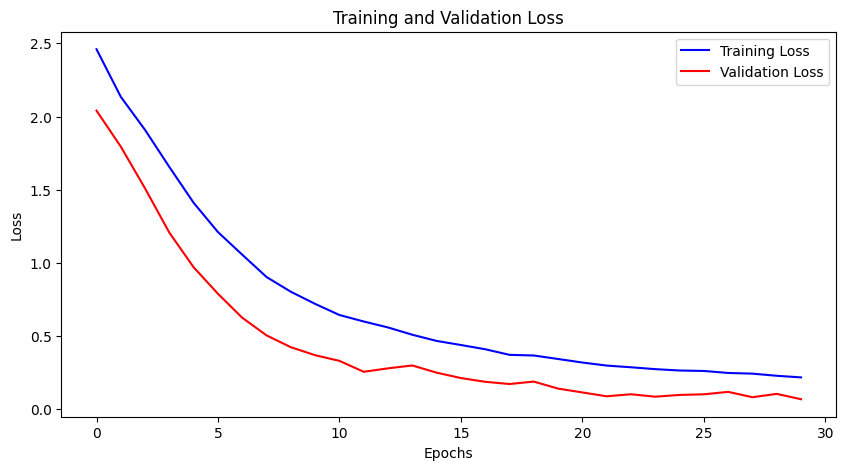

In [ ]:
# Assuming history is returned from model.fit()
plot_training_history(history)

Evaluating the model performance

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


494/494 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9788 - loss: 0.0687
Test Accuracy: 0.98


In [ ]:
model.save("lstm_gait_model.h5")

Function to test the model on one image frame

In [ ]:
import numpy as np
import tensorflow as tf
import json

def test_single_frame_with_threshold(model, json_path, sequence_length=50, normalize=True, threshold=0.3):
    """
    Tests the LSTM model on a single image frame with an "unknown" detection threshold.

    :param model: Trained LSTM model
    :param json_path: Path to the JSON file containing skeleton keypoints
    :param sequence_length: Number of frames in a sequence (default 50)
    :param normalize: Whether to normalize keypoints to [0,1]
    :param threshold: Confidence threshold for rejecting uncertain predictions
    :return: Predicted class or "Unknown"
    """

    # Load the JSON file and extract keypoints
    with open(json_path, "r") as f:
        data = json.load(f)

    people = data.get("people", [])
    if len(people) == 0:
        print("No skeleton detected in the image frame.")
        return "Unknown"

    keypoints = people[0].get("pose_keypoints_2d", [])
    if not keypoints:
        print("No keypoints found in the JSON file.")
        return "Unknown"

    # Extract (x, y) coordinates only (ignore confidence scores)
    xy_coords = [keypoints[i:i+2] for i in range(0, len(keypoints), 3)]
    frame_data = np.array(xy_coords).flatten()  # Shape: (num_features,)

    # Normalize if needed
    if normalize:
        frame_data = frame_data / np.max(frame_data)

    # Duplicate the single frame to match the sequence length
    sequence = np.tile(frame_data, (sequence_length, 1))  # Shape: (sequence_length, num_features)

    # Reshape for prediction
    sequence = np.expand_dims(sequence, axis=0)  # Shape: (1, sequence_length, num_features)

    # Make prediction
    predictions = model.predict(sequence)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class with highest probability
    confidence = np.max(predictions)  # Get the confidence score of the prediction

    # Apply confidence threshold
    if confidence < threshold:
        print(f"Prediction rejected. Confidence too low ({confidence:.2f}). Marking as 'Unknown'.")
        return "Unknown"

    print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")
    return predicted_class


In [ ]:
# Load the trained model
model = tf.keras.models.load_model("lstm_gait_model.h5")

# Path to the JSON file containing keypoints for a single frame
json_path = "/content/Data/Participant_2/Experiment_2/E2T3/P2_E2T3_45_json/P2_E2T3_45_000000000046_keypoints.json"

# Test on a single frame
predicted_class = test_single_frame_with_threshold(model, json_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted Class: 4 (Confidence: 0.83)


3D MODEL TRAINING

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_3d_lstm_model(input_shape, num_classes):
    """
    Builds a 3D LSTM model for gait recognition.

    :param input_shape: Tuple (sequence_length, num_features)
    :param num_classes: Number of participant classes
    :return: Compiled 3D LSTM model
    """
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        BatchNormalization(),

        LSTM(64, return_sequences=False),
        Dropout(0.3),
        BatchNormalization(),

        Dense(32, activation="relu"),
        Dropout(0.3),

        Dense(num_classes, activation="softmax")  # Multi-class classification
    ])

    # Compile the model
    model.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=["accuracy"])

    return model

# Assume X2_train, X2_test, y2_train, y2_test are obtained from prepare_lstm_data_ten_participants_3d
sequence_length = X2_train.shape[1]  # 50 (frames per sequence)
num_features = X2_train.shape[2]     # 75 (flattened 3D keypoints per frame)
num_classes = y2_train.shape[1]      # Number of participant classes

# Build the 3D LSTM model
model_3d = build_3d_lstm_model(input_shape=(sequence_length, num_features), num_classes=num_classes)

# Print model summary
model_3d.summary()

In [ ]:
# Assuming you have built the model_3d and have X_train, y_train, X_test, y_test

# Fit the model
history = model_3d.fit(
    X2_train,
    y2_train,
    epochs=30,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust the batch size as needed
    validation_data=(X2_test, y2_test),  # Use validation data for monitoring performance
    verbose=1  # Set to 1 to display training progress
)

In [ ]:
model_3d.save("3d_lstm_gait_model.h5")  # Save the model to a file

In [ ]:
test_loss, test_acc = model_3d.evaluate(X2_test, y2_test, verbose=0)
   print(f"Test Accuracy: {test_acc:.2f}")

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation loss and accuracy from the history object.

    :param history: History object returned by model.fit()
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot Loss
    ax1.plot(history.history['loss'], label='Training Loss', color='blue')
    ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper right')

    # Plot Accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='lower right')

    plt.show()

# Assuming 'history' is the object returned by model_3d.fit()
plot_training_history(history)